<h1 style="font-size:2.75rem;color:black;"> Design Script for a Differential Pair with Active Loads</h1>

# <u> Imports

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter

# <u> Units

In [2]:
q  = 1.60e-19   # Electron charge
KB = 1.38e-23   # Boltzmann constant

engFormat_Gain  = EngFormatter(unit='dB',     places=3, sep=' ')
engFormat_GBW   = EngFormatter(unit='Hz',     places=3, sep=' ')
engFormat_OS    = EngFormatter(unit='V',      places=3, sep=' ')
engFormat_PD    = EngFormatter(unit='W',      places=3, sep=' ')
engFormat_FoM   = EngFormatter(unit='s/V^-2', places=3, sep=' ')
engFormat_Width = EngFormatter(unit='m',      places=2, sep=' ')

# <u> Design data

In [3]:
IB  = 100e-06   # Bias current
CL  = 1.0e-12   # Load capacitance
VDD = 1.2       # Supply voltage
BE  = 0.75

# Transistor lengths
L_1N     = 0.6e-06;  L_3N     = 0.6e-06;  L_5P     = 0.6e-06;
# Bulk-source voltage drop
VBS_1N   = 0;        VBS_3N   = 300e-03;  VBS_5P   = 0;
# Saturation voltage voltage
VDSAT_1N = 100e-03;  VDSAT_3N = 100e-03;  VDSAT_5P = 100e-03;

# Array definition
L_arr    = np.arange(0.24e-06, 1.00e-06, 0.76e-06/100)
VSAT_arr = np.arange(50e-03, 250e-03, 200e-03/100)

# <u> Technology Definitions

In [4]:
# Parameters for TSMC65NM (K = u0*Cox = u0*E0*epsrox/toxm)
V_TN = 0.28615208;   K_N = 244.961e-06; # 0.0184444380*8.854e-12*3.9/2.60e-09
V_TP = 0.43718619;   K_P = 130.808e-06; # 0.0106069150*8.854e-12*3.9/2.80e-09
# Non LDD region source-gate overlap capacitance per unit channel width - CGSO/CGDO (TSMC65NM)
CGSD0_N = 89.18e-12
CGSD0_P = 74.90e-12

# Cox = E0*Er/tox (TSMC65NM)
COX_N = 13.28e-03   # 8.854e-12*3.9/2.60e-09
COX_P = 12.33e-03   # 8.854e-12*3.9/2.80e-09

# Drain/source minimum drawing area
Sd_s = 0.2*1e-06

# Bottom junction capacitance per unit area at zero bias - CJS/CJD (TSMC65NM)
CJ_N   = 1.185e-03;   CJ_P   = 1.068e-03;

# Bottom junction built-in potential - PBS/PBD (TSMC65NM)
PB_N   = 0.700;       PB_P   = 0.700;

# Bottom junction capacitance grating coefficient - MJS/MJD (TSMC65NM)
MJ_N   = 0.310;       MJ_P   = 0.310;

# Isolation-edge sidewall junction capacitance per unit area - CJSWS/CJSWD (TSMC65NM)
CJSW_N = 94.00e-12;   CJSW_P =  76.00e-12;

# Isolation-edge sidewall junction capacitance grading coefficient MJSWS/MJSWD (TSMC65NM)
MJSW_N = 0.080;       MJSW_P = 0.060;

In [5]:
# u0 is dependent on the transistor dimensions
def u0_arr_N(W, L):
    if   (W >=  10e-06 and W <= 900e-06):
        if   (L >=  10e-06 and L <=  20e-06): return 0.0203900000
        elif (L >=   1e-06 and L <   10e-06): return 0.0206752440
        elif (L >= 240e-09 and L <    1e-06): return 0.0184444380
        elif (L >= 100e-09 and L <  240e-09): return 0.0159778710
        elif (L >=  60e-09 and L <  100e-09): return 0.0105131640
        else: return -1
    elif (W >=   1e-06 and W <   10e-06):
        if   (L >=  10e-06 and L <=  20e-06): return 0.0205407330
        elif (L >=   1e-06 and L <   10e-06): return 0.0208280430
        elif (L >= 240e-09 and L <    1e-06): return 0.0185811630
        elif (L >= 100e-09 and L <  240e-09): return 0.0160011950
        elif (L >=  60e-09 and L <  100e-09): return 0.0106698390
        else: return -1
    elif (W >= 600e-09 and W <    1e-06):
        if   (L >=  10e-06 and L <=  20e-06): return 0.0217105000
        elif (L >=   1e-06 and L <   10e-06): return 0.0220157430
        elif (L >= 240e-09 and L <    1e-06): return 0.0196231290
        elif (L >= 100e-09 and L <  240e-09): return 0.0179624840
        elif (L >=  60e-09 and L <  100e-09): return 0.0082323123
        else: return -1
    elif (W >= 300e-09 and W <  600e-06):
        if   (L >=  10e-06 and L <=  20e-06): return 0.0174033330
        elif (L >=   1e-06 and L <   10e-06): return 0.0176456830
        elif (L >= 240e-09 and L <    1e-06): return 0.0157559150
        elif (L >= 100e-09 and L <  240e-09): return 0.0144015760
        elif (L >=  60e-09 and L <  100e-09): return 0.0066402542
        else: return -1
    elif (W >= 120e-09 and W <  300e-06):
        if   (L >=  10e-06 and L <=  20e-06): return 0.0175100000
        elif (L >=   1e-06 and L <   10e-06): return 0.0177556860
        elif (L >= 240e-09 and L <    1e-06): return 0.0158322950
        elif (L >= 100e-09 and L <  240e-09): return 0.0147731200
        elif (L >=  60e-09 and L <  100e-09): return 0.0128307880
        else: return -1
    else:
        return -1
    
def u0_arr_P(W, L):
    if   (W >=  10e-06 and W <= 900e-06):
        if   (L >=  10e-06 and L <=  20e-06): return 0.0117200000
        elif (L >=   1e-06 and L <   10e-06): return 0.0118838970
        elif (L >= 240e-09 and L <    1e-06): return 0.0106069150
        elif (L >= 100e-09 and L <  240e-09): return 0.0097253089
        elif (L >=  60e-09 and L <  100e-09): return 0.0054866509
        else: return -1
    elif (W >=   1e-06 and W <   10e-06):
        if   (L >=  10e-06 and L <=  20e-06): return 0.0116905330
        elif (L >=   1e-06 and L <   10e-06): return 0.0118730050
        elif (L >= 240e-09 and L <    1e-06): return 0.0103958770
        elif (L >= 100e-09 and L <  240e-09): return 0.0095315421
        elif (L >=  60e-09 and L <  100e-09): return 0.0053767740
        else: return -1
    elif (W >= 600e-09 and W <    1e-06):
        if   (L >=  10e-06 and L <=  20e-06): return 0.0115615000
        elif (L >=   1e-06 and L <   10e-06): return 0.0113074600
        elif (L >= 240e-09 and L <    1e-06): return 0.0145007250
        elif (L >= 100e-09 and L <  240e-09): return 0.0132993490
        elif (L >=  60e-09 and L <  100e-09): return 0.0076226273
        else: return -1
    elif (W >= 300e-09 and W <  600e-06):
        if   (L >=  10e-06 and L <=  20e-06): return 0.0135300000
        elif (L >=   1e-06 and L <   10e-06): return 0.0137039520
        elif (L >= 240e-09 and L <    1e-06): return 0.0123928480
        elif (L >= 100e-09 and L <  240e-09): return 0.0113642910
        elif (L >=  60e-09 and L <  100e-09): return 0.0055557057
        else: return -1
    elif (W >= 120e-09 and W <  300e-06):
        if   (L >=  10e-06 and L <=  20e-06): return 0.0104900000
        elif (L >=   1e-06 and L <   10e-06): return 0.0106371380
        elif (L >= 240e-09 and L <    1e-06): return 0.0094906926
        elif (L >= 100e-09 and L <  240e-09): return 0.0086965429
        elif (L >=  60e-09 and L <  100e-09): return 0.0048266510
        else: return -1
    else:
        return -1
    
def u0_arr_N_cond(W, L):
    return np.vectorize(u0_arr_N)(W, L)
    
def u0_arr_P_cond(W, L):
    return np.vectorize(u0_arr_P)(W, L)

# <u> Transistor equations

In [6]:
def gm(ID, VDSAT):
    return np.piecewise (VDSAT, [VDSAT < 2*KB*300/q, VDSAT >= 2*KB*300/q], \
                  [lambda VDSAT: ID/(KB*300/q), lambda VDSAT: 2*ID/VDSAT])

# NEW EQUATION - CALCULATES W A SECOND TIME TO MAKE SURE IT USES THE CORRECT u0 VALUE
def W_N(ID, VDSAT, L):
    W_est = L * 2 * ID / (K_N * VDSAT**2)
    for i in range(0, 1):
        W_est = L * 2 * ID / (u0_arr_N_cond(W_est, L) * COX_N * VDSAT**2)
    return W_est

def W_P(ID, VDSAT, L):
    W_est = L * 2 * ID / (K_P * VDSAT**2)
    for i in range(0, 1):
        W_est = L * 2 * ID / (u0_arr_P_cond(W_est, L) * COX_N * VDSAT**2)
    return W_est

def gds_N(ID, L):
    return ID / (5000 * L * 1e-03/1e-06)

def gds_P(ID, L):
    return ID / (7500 * L * 1e-03/1e-06)

def CGD_N(ID, VDSAT, L):
    return W_N(ID, VDSAT, L) * CGSD0_N

def CGD_P(ID, VDSAT, L):
    return W_P(ID, VDSAT, L) * CGSD0_P

def CGS_N(ID, VDSAT, L):
    return (2/3) * W_N(ID, VDSAT, L) * L * COX_N

def CGS_P(ID, VDSAT, L):
    return (2/3) * W_P(ID, VDSAT, L) * L * COX_P

def CDB_N(ID, VDSAT, L, VDB):
    return ((W_N(ID, VDSAT, L) + Sd_s) * 2 * CJSW_N) / ((1 + VDB / PB_N)**MJSW_N) + \
        (W_N(ID, VDSAT, L) * Sd_s * CJ_N) / ((1 + VDB / PB_N)**MJ_N)

def CDB_P(ID, VDSAT, L, VDB):
    return ((W_P(ID, VDSAT, L) + Sd_s) * 2 * CJSW_P) / ((1 + VDB / PB_P)**MJSW_P) + \
        (W_P(ID, VDSAT, L) * Sd_s * CJ_P) / ((1 + VDB / PB_P)**MJ_P)

def CSB_N(ID, VDSAT, L, VBS):
    return ((W_N(ID, VDSAT, L) * (Sd_s + L) * CJ_N) / ((1 - VBS / PB_N)**MJ_N)) + \
        ((W_N(ID, VDSAT, L) + Sd_s) * 2 * CJSW_N) / ((1 - VBS / PB_N)**MJSW_N) + \
        (2 * W_N(ID, VDSAT, L) * L * CJ_N) / (3 * ((1 - VBS / PB_N)**MJ_N))

def CSB_P(ID, VDSAT, L, VBS):
    return ((W_P(ID, VDSAT, L) * (Sd_s + L) * CJ_P) / ((1 - VBS / PB_P)**MJ_P)) + \
        ((W_P(ID, VDSAT, L) + Sd_s) * 2 * CJSW_P) / ((1 - VBS / PB_P)**MJSW_P) + \
        (2 * W_P(ID, VDSAT, L) * L * CJ_P) / (3 * ((1 - VBS / PB_P)**MJ_P))

# <u> Circuit equations

\begin{gather*}
A_v = \dfrac{BE \times g_{m3}}{g_{ds3} + g_{ds5}} \\[0.125cm]
GBW = \dfrac{BE \times g_{m3}}{2 \pi \times (C_L + C_{db3} + C_{db5} + C_{gd5})} \\[0.125cm]
OS = V_{DD} - V_{dsat1} - V_{dsat3} - V_{dsat5} - 0.1 \\[0.125cm]
\textit{Power} = V_{DD} \times (2 \times \dfrac{I_B}{2} + \dfrac{I_B}{10}) \\[0.125cm]
FoM = 1000 \times \dfrac{GBW \times C_L}{\textit{Power}}
\end{gather*}

In [7]:
def gain(IB, VDSAT_3N, L_3N, L_5P):
    return BE * gm(0.5*IB, VDSAT_3N) / (gds_N(0.5*IB, L_3N) + gds_P(0.5*IB, L_5P))

def cout(IB, VDSAT_3N, VDSAT_5P, L_3N, L_5P):
    return CL + CDB_N(0.5*IB, VDSAT_3N, L_3N, VBS_3N) + CDB_P(0.5*IB, VDSAT_5P, L_5P, VBS_5P) + \
        CGD_N(0.5*IB, VDSAT_3N, L_3N) + CGD_P(0.5*IB, VDSAT_5P, L_5P)

def GBW(IB, VDSAT_3N, VDSAT_5P, L_3N, L_5P):
    return BE * gm(0.5*IB, VDSAT_3N) / (2 * np.pi * cout(IB, VDSAT_3N, VDSAT_5P, L_3N, L_5P))

def OS(VDD, VDSAT_1N, VDSAT_3N, VDSAT_5P):
    return VDD - VDSAT_1N - VDSAT_3N - VDSAT_5P - 0.1

def PD(VDD, IB):
    return VDD * (2 * IB / 2 + 1 * IB / 10)

def FoM(GBW, CL, PD):
    return 1000 * GBW(IB, VDSAT_3N, VDSAT_5P, L_3N, L_5P) * CL / PD(VDD, IB)

# <u> Circuit parameter plots

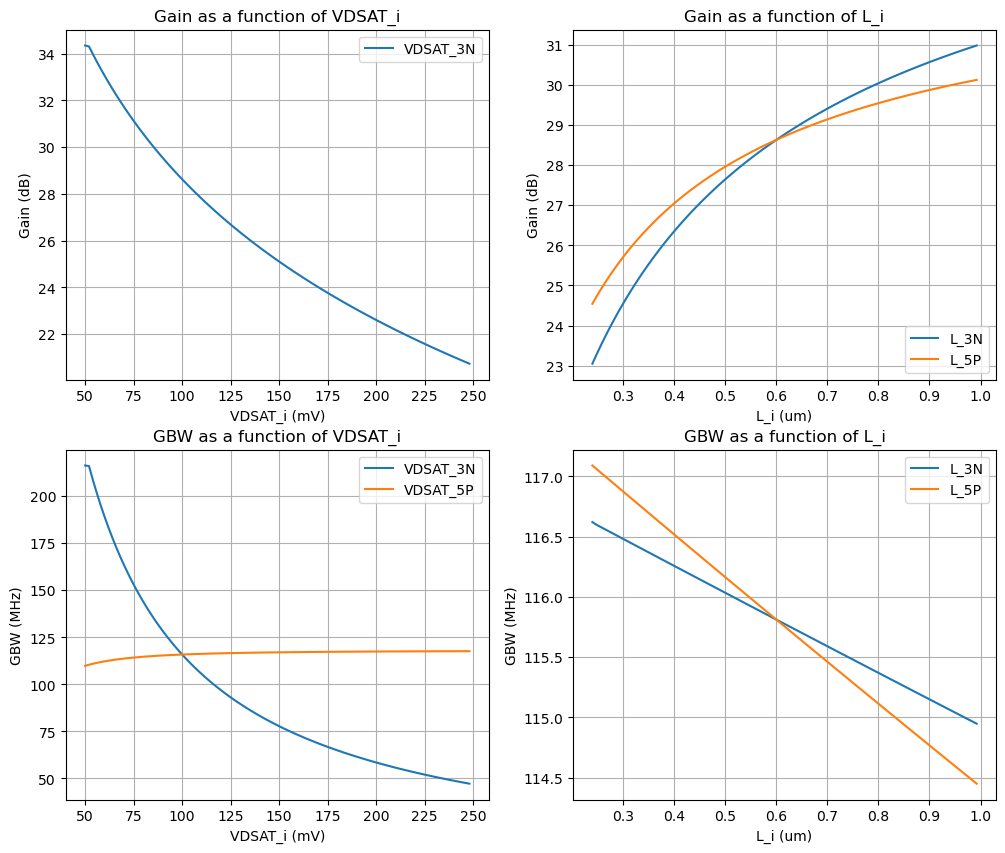

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
#fig.tight_layout()

################################################## GAIN PLOTS ##################################################
plt.subplot(2, 2, 1);   plt.grid()
plt.plot(1e+03 * VSAT_arr, 20*np.log10(gain(IB, VSAT_arr, L_3N, L_5P)))
plt.xlabel('VDSAT_i (mV)')
plt.ylabel('Gain (dB)')
plt.title('Gain as a function of VDSAT_i')
plt.legend(['VDSAT_3N'])

plt.subplot (2, 2, 2); plt.grid ()
plt.plot (1e+06*L_arr, 20*np.log10(gain(IB, VDSAT_3N, L_arr, L_5P)))
plt.plot (1e+06*L_arr, 20*np.log10(gain(IB, VDSAT_3N, L_3N,  L_arr)))
plt.xlabel('L_i (um)')
plt.ylabel('Gain (dB)')
plt.title('Gain as a function of L_i')
plt.legend(['L_3N','L_5P'], loc="lower right")

################################################## GBW PLOTS ##################################################
plt.subplot(2, 2, 3);   plt.grid()
plt.plot(1e+03 * VSAT_arr, 1e-06*GBW(IB, VSAT_arr, VDSAT_5P, L_3N, L_5P))
plt.plot(1e+03 * VSAT_arr, 1e-06*GBW(IB, VDSAT_3N, VSAT_arr, L_3N, L_5P))
plt.xlabel('VDSAT_i (mV)')
plt.ylabel('GBW (MHz)')
plt.title('GBW as a function of VDSAT_i')
plt.legend(['VDSAT_3N','VDSAT_5P'])

plt.subplot(2, 2, 4);   plt.grid()
plt.plot(1e+06 * L_arr, 1e-06*GBW(IB, VDSAT_3N, VDSAT_5P, L_arr, L_5P))
plt.plot(1e+06 * L_arr, 1e-06*GBW(IB, VDSAT_3N, VDSAT_5P, L_3N, L_arr))
plt.xlabel('L_i (um)')
plt.ylabel('GBW (MHz)')
plt.title('GBW as a function of L_i')
plt.legend(['L_3N','L_5P'], loc="upper right")

plt.show()

# <u> Circuit optimization

In [9]:
IB  = 100e-06;   CL  = 1.0e-12;   VDD = 1.2;   BE  = 0.60

# Transistor lengths
L_1N     = 0.60e-06; L_3N     = 0.60e-06; L_5P     = 0.60e-06;
# Saturation voltage voltage
VDSAT_1N =  100e-03; VDSAT_3N =   50e-03; VDSAT_5P =  250e-03;

print("Performance parameters:")

print("-> Gain = "+engFormat_Gain(20*np.log10(gain(IB, VDSAT_3N, L_3N, L_5P))))
print("-> GBW  = "+engFormat_GBW(GBW(IB, VDSAT_3N, VDSAT_5P, L_3N, L_5P)))
print("-> OS   = "+engFormat_OS(OS(VDD, VDSAT_1N, VDSAT_3N, VDSAT_5P)))
print("-> PD   = "+engFormat_PD(PD(VDD, IB)))
print("-> FoM  = "+engFormat_FoM(FoM(GBW, CL, PD)))

print("\nDesign parameters:")

W_1N  = W_N(      IB, VDSAT_1N, L_1N);        print("-> W_1N  = "+engFormat_Width(W_1N))
W_3N  = W_N(0.5 * IB, VDSAT_3N, L_3N);        print("-> W_3N  = "+engFormat_Width(W_3N))
W_5P  = W_P(0.5 * IB, VDSAT_5P, L_5P);        print("-> W_5P  = "+engFormat_Width(W_5P))

L_B1N = L_1N
W_B1N = W_N(0.1 * IB, VDSAT_1N, L_B1N);        print("-> W_B1N = "+engFormat_Width(W_B1N))

Performance parameters:
-> Gain = 32.411 dB
-> GBW  = 175.646 MHz
-> OS   = 700.000 mV
-> PD   = 132.000 µW
-> FoM  = 1.331 ks/V^−2

Design parameters:
-> W_1N  = 48.99 µm
-> W_3N  = 97.98 µm
-> W_5P  = 6.95 µm
-> W_B1N = 4.86 µm
